In [1]:
#GOALS 
  #LOAD & EXTRACT ZIP FILES INTO A DATAFRAME
  #PERFORM EXPLORATORY DATA ANALYSIS
  #CREATE VISUALIZATIONS USING PYTHON
  #MANIPULATE PANDAS FOR EXPLORATORY DATA ANALYSIS  

# 1. Import files into a dataframe
# 2. Create univariate plots of variables: rating, age, release date, gender, occupation
# 3. Visualize how the popularity of genres have changed over the years.  From the graph, we
    #should be able to see (for any given year) movies of which genre got released the most            

#1 import packages that we will use to create the plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#2 open datasets into dataframes so that we can analyze the data
data=pd.read_csv('Data.csv')
item=pd.read_csv('item.csv')
user=pd.read_csv('user.csv')
                                

In [3]:
#3 apply info, shape, describe and find the number of missing values

#data
print(data.head())
print()
print(data.info())
print()
print(data.shape)
print()
print(data.describe())
print()
print(data.isnull().sum())





   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

(100000, 4)

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000     

In [4]:

#item
print(item.head())
print()
print(item.info())
print()
print(item.shape)
print()
print(item.describe())
print()
print(item.isnull().sum())

   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   
3         4  Get Shorty   01-Jan-1995        0       1          0          0   
4         5     Copycat   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...        0          0       0        0   
3          0       1      0  ...        0          0       0        0   
4          0       0      1  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       

In [5]:
#user
print(user.head())
print()
print(user.info())
print()
print(user.shape)
print()
print(user.describe())
print()
print(user.isnull().sum())

   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

(943, 5)

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

user id      

In [6]:
#None of the datasets have null values. 
#All the genre columns (Action, Western, Sci-Fi, etc.) are binary
#People from all age groups are present as minimum age is 7 and maximum is 73

In [7]:
#4 Find the number of movies per genre

item.columns #gives us the names of all columns in the dataframe


Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [8]:
item.loc[:,'Action':'Western'].sum()#sum each column by using the location function

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [9]:
item[['unknown','Action']].corr()  #we can run correlations on columns

,unknown,Action
unknown,1.000000,-0.010221
Action,-0.010221,1.000000


In [10]:
#5  Find the number of movies that have more than 1 genre

GenreCount=item[item == 1].sum(axis=1) #counts each row's genre counts. Where each column value=1, it totals the row 
Number_of_Multiple_Genre_Movies=(GenreCount>1).sum() #selects each movie with a count>1
print('Number of Movies with Multiple Genres:', Number_of_Multiple_Genre_Movies)

Number of Movies with Multiple Genres: 849


In [11]:
MultiGenre = item[['movie id','movie title']]  #construct a dataframe that shows the movie id, movie title and number of genres

In [12]:
MultiGenre["Number of Genres"] =item.loc[:,'Action':'Western'].sum(axis=1) #calculate number of Genres for each movie

In [13]:
MultiGenre[MultiGenre['Number of Genres']>1] #result - new dataframe that shows only multigenre movies

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


In [14]:
#6 Drop the item where the genre is unknown
item[item.unknown == 1] #identify movies with unknown genre code
item=item.drop(item.index[1371]) #drops the movie line that we located

In [15]:
#7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

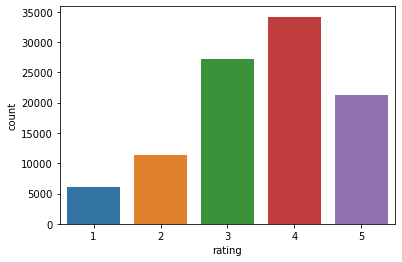

In [16]:
sns.countplot(data['rating']) #display countplot for 'rating'
plt.show()      #a 4 rating is most common

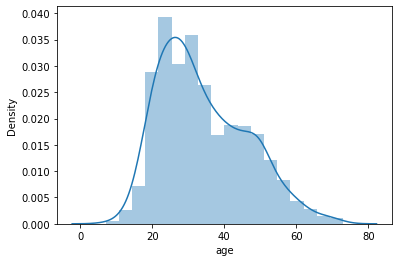

In [17]:
sns.distplot(user['age']) #display histogram for 'age'
plt.show()            #most moviegoers appear to be in their 20s/30s 

In [18]:
item['release date']=pd.to_datetime(item['release date']) #reformat the date so we can "harvest" the year for a new column
item['release year']=(item['release date'].dt.year) #create release year for visualization

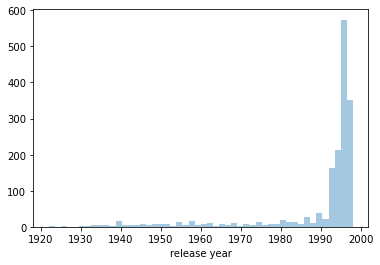

In [19]:
sns.distplot(item['release year'],kde=False) #create release year distribution
plt.show()
print() #most movies were created during/after the 90s

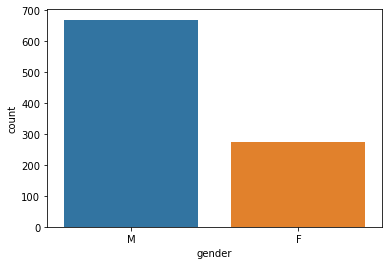

In [20]:
sns.countplot(user['gender']) #display a countplot for 'gender'
plt.show()  #men appear to consume more movies than women

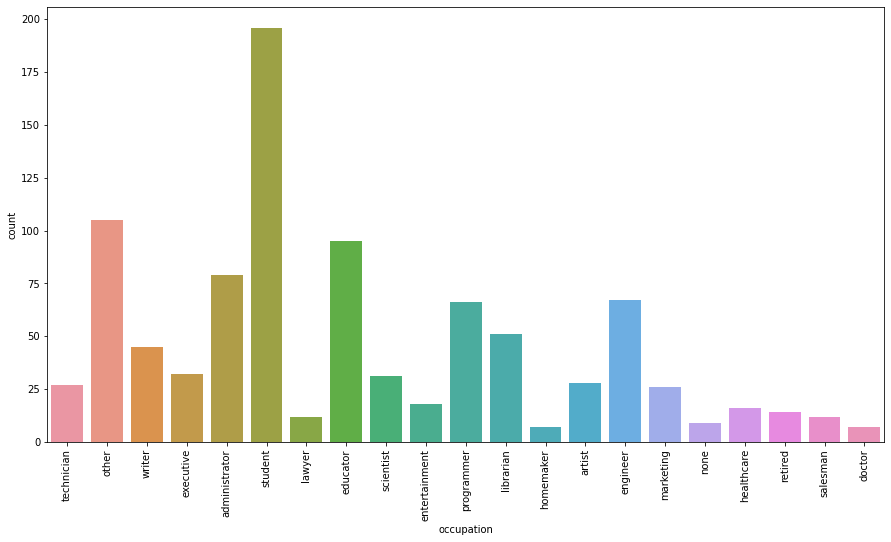

In [21]:
plt.figure(figsize=(15,8))  #display countplot for 'occupation'
sns.countplot(user['occupation'])
plt.xticks(rotation=90)
plt.show()   #it appears that students consume more movies that other groups/occupations with doctors consuming the least

In [24]:
#visualize how popularity of genres has changed over time
genre_by_year = item.groupby('release year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


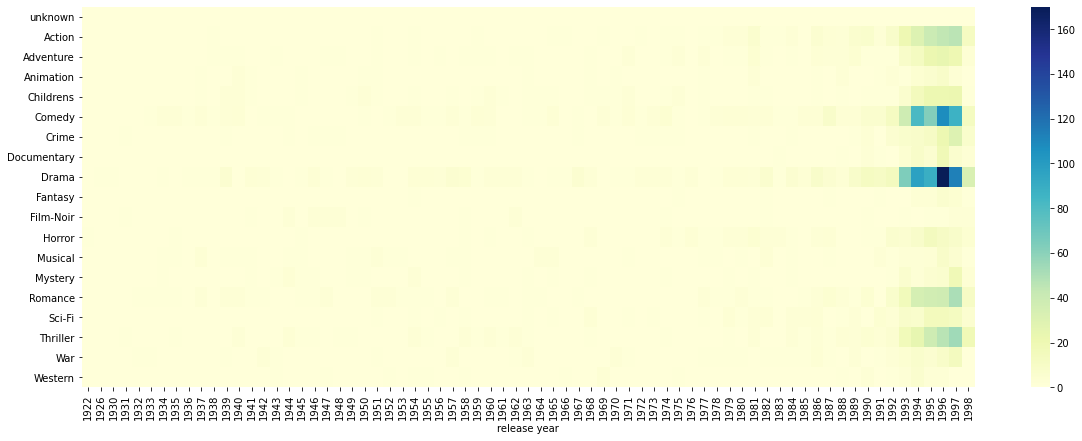

In [25]:
plt.figure(figsize=(20,7))  #setting the figure size   
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heatmap visualizes the change in genre over the years
plt.show()

In [40]:
#Find the top 25 movies
UserDf = user.merge(data,on='user id',how='inner')
NewDf = item.merge(UserDf,on='movie id',how='inner')
NewDf.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,release year,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,1995,10,53,M,lawyer,90703,4,877888877


In [34]:
movie_100 = NewDf.groupby(['movie id','movie title'])['rating'].count().reset_index()
movie_t = list(movie_100[movie_100['rating']>100]['movie id'])

In [35]:
#Top 25 movies by rating
avg_rating = NewDf.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['movie id'].isin(movie_t)].head(25)


,movie id,movie title,rating
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


In [44]:
#Explore gender differences
Genre_by_gender = NewDf.groupby('gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum for all genres


In [43]:
Genre_by_gender['total'] = user['gender'].value_counts()  #Row total of genre by gender
print()
Genre_by_gender


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,273
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,670
